# Infant Mortality Prediction 
    
 * This dataset is collected from [Centers for Disease Control and Prevention](https://www.cdc.gov/nchs/nvss/births.htm) contains various attributes and features regarding a mother during gestation such health , physical , social and economic data with diverse outcomes.
 
 
 * The classier aimed to predict the mortality of an infant based on the given attributes in the dataset.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
# importing training dataset 
train_df = pd.read_csv("train_infant.csv")
train_df.head()

,Birth Place Recode,Mothers Single Year of Age,Month Prenatal Care Began Recode,Number of Prenatal Visits Recode,Cigarettes Before Pregnancy,Cigarettes 1st trimester,Cigarettes 2nd trimester,Cigarettes 3rd trimester,Prepregnancy Diabetes,Gestational Diabetes,...,Syphillis,Hepatitis B,Hepatitis C,Induction of Labor,Sex of Infant,BMI,Interval Since Last Live Birth Recode 11,Interval Since Last Pregnancy Recode 11,Mother's Height in Inches,Infant Living at Time of Report
0,2,34,1,9,0,0,0,0,0,0,...,0,0,0,2,1,2,88,88,61,1
1,2,29,3,6,0,0,0,0,0,0,...,0,0,0,2,1,1,88,88,65,1
2,2,18,2,5,0,0,0,0,0,0,...,0,0,0,2,1,2,88,88,61,1
3,1,29,1,6,0,0,0,0,0,0,...,3,3,3,2,0,2,88,88,68,1
4,1,36,1,9,0,0,0,0,3,3,...,0,0,0,2,1,3,5,5,64,1


In [3]:
train_df.shape

(40483, 30)

In [5]:
train_df.columns

Index(['Birth Place Recode', 'Mothers Single Year of Age',
       'Month Prenatal Care Began Recode', 'Number of Prenatal Visits Recode',
       'Cigarettes Before Pregnancy ', 'Cigarettes 1st trimester',
       'Cigarettes 2nd trimester', 'Cigarettes 3rd trimester',
       'Prepregnancy Diabetes', 'Gestational Diabetes',
       'Prepregnancy Hypertension', 'Gestational Hypertension', 'Eclampsia',
       'Previous Preterm Birth', 'Infertility Treatment ',
       'Fertility Enhancing Drug', 'Number of previous Cesarean Deliveries',
       'Chronic Hypertension', 'Pregnancy Associated Hypertension',
       'Gonorrhea', 'Syphillis', 'Hepatitis B ', 'Hepatitis C ',
       'Induction of Labor', 'Sex of Infant ', 'BMI',
       'Interval Since Last Live Birth Recode 11',
       'Interval Since Last Pregnancy Recode 11', 'Mother's Height in Inches',
       'Infant Living at Time of Report'],
      dtype='object')

In [4]:
# shuffling the dataset so that the target labels gets scattered
train_df = train_df.sample(frac=1).reset_index(drop=True)

In [5]:
train_df[train_df["Infant Living at Time of Report"] == 0]

,Birth Place Recode,Mothers Single Year of Age,Month Prenatal Care Began Recode,Number of Prenatal Visits Recode,Cigarettes Before Pregnancy,Cigarettes 1st trimester,Cigarettes 2nd trimester,Cigarettes 3rd trimester,Prepregnancy Diabetes,Gestational Diabetes,...,Syphillis,Hepatitis B,Hepatitis C,Induction of Labor,Sex of Infant,BMI,Interval Since Last Live Birth Recode 11,Interval Since Last Pregnancy Recode 11,Mother's Height in Inches,Infant Living at Time of Report
346,1,21,3,3,0,0,0,1,0,0,...,0,0,0,2,0,1,2,2,67,0
913,1,28,1,10,0,0,0,0,0,0,...,0,0,0,2,0,4,88,8,62,0
965,1,23,1,6,0,0,0,0,0,0,...,0,0,0,2,1,4,1,1,67,0
1242,1,18,2,4,0,0,0,0,0,0,...,0,0,0,1,1,6,88,88,43,0
1732,1,36,1,8,0,0,0,0,0,0,...,0,0,0,2,1,2,88,1,65,0
1987,1,29,2,5,0,0,0,0,0,0,...,0,0,0,2,1,4,88,88,59,0
2084,1,30,1,9,0,0,0,0,0,1,...,0,0,0,2,0,2,88,88,64,0
2312,1,25,1,6,0,0,0,0,0,0,...,0,0,0,2,0,4,88,99,63,0
2324,1,26,1,4,0,0,0,0,0,0,...,0,0,0,2,1,3,88,88,63,0
3422,1,21,1,6,0,0,0,0,0,0,...,0,0,0,2,1,3,2,2,59,0


In [8]:
# importing testing dataset
test_df = pd.read_csv("test_infant.csv")
test_df.head()

,Birth Place Recode,Mothers Single Year of Age,Month Prenatal Care Began Recode,Number of Prenatal Visits Recode,Cigarettes Before Pregnancy,Cigarettes 1st trimester,Cigarettes 2nd trimester,Cigarettes 3rd trimester,Prepregnancy Diabetes,Gestational Diabetes,...,Gonorrhea,Syphillis,Hepatitis B,Hepatitis C,Induction of Labor,Sex of Infant,BMI,Interval Since Last Live Birth Recode 11,Interval Since Last Pregnancy Recode 11,Mother's Height in Inches
0,1,27,1,9,0,0,0,0,0,0,...,0,0,0,0,2,0,2,88,88,62
1,1,25,1,6,0,0,0,0,0,0,...,0,0,0,0,1,1,5,88,5,66
2,1,20,1,6,0,0,0,0,0,0,...,0,0,0,0,2,0,9,88,88,99
3,1,17,2,4,0,0,0,0,0,0,...,0,0,0,0,2,1,3,88,88,66
4,1,24,2,5,0,0,0,0,0,0,...,0,0,0,0,1,0,2,3,3,66


In [9]:
# We can see it doesn't have the target label
test_df.shape

(58, 29)

In [10]:
test_df.columns

Index(['Birth Place Recode', 'Mothers Single Year of Age',
       'Month Prenatal Care Began Recode', 'Number of Prenatal Visits Recode',
       'Cigarettes Before Pregnancy ', 'Cigarettes 1st trimester',
       'Cigarettes 2nd trimester', 'Cigarettes 3rd trimester',
       'Prepregnancy Diabetes', 'Gestational Diabetes',
       'Prepregnancy Hypertension', 'Gestational Hypertension', 'Eclampsia',
       'Previous Preterm Birth', 'Infertility Treatment ',
       'Fertility Enhancing Drug', 'Number of previous Cesarean Deliveries',
       'Chronic Hypertension', 'Pregnancy Associated Hypertension',
       'Gonorrhea', 'Syphillis', 'Hepatitis B ', 'Hepatitis C ',
       'Induction of Labor', 'Sex of Infant ', 'BMI',
       'Interval Since Last Live Birth Recode 11',
       'Interval Since Last Pregnancy Recode 11', 'Mother's Height in Inches'],
      dtype='object')

In [11]:
train_df.describe()

,Birth Place Recode,Mothers Single Year of Age,Month Prenatal Care Began Recode,Number of Prenatal Visits Recode,Cigarettes Before Pregnancy,Cigarettes 1st trimester,Cigarettes 2nd trimester,Cigarettes 3rd trimester,Prepregnancy Diabetes,Gestational Diabetes,...,Syphillis,Hepatitis B,Hepatitis C,Induction of Labor,Sex of Infant,BMI,Interval Since Last Live Birth Recode 11,Interval Since Last Pregnancy Recode 11,Mother's Height in Inches,Infant Living at Time of Report
count,40483.000000,40483.000000,40483.000000,40483.000000,40483.000000,40483.000000,40483.000000,40483.000000,40483.000000,40483.000000,...,40483.000000,40483.000000,40483.000000,40483.000000,40483.000000,40483.000000,40483.000000,40483.000000,40483.000000,40483.000000
mean,1.013388,25.754564,1.361954,6.928538,0.547217,0.531680,0.531729,0.530297,0.025937,0.039325,...,0.028654,0.029074,0.028926,1.990218,0.518119,2.792258,43.819183,41.407060,63.430650,0.996517
std,0.117483,6.061387,0.728585,1.781825,6.698181,6.862026,6.952868,6.981837,0.241488,0.266142,...,0.290095,0.290776,0.290536,0.736389,0.499678,1.298482,41.500572,41.855216,3.748972,0.058914
min,1.000000,12.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,30.000000,0.000000
25%,1.000000,21.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,5.000000,4.000000,62.000000,1.000000
50%,1.000000,25.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,8.000000,8.000000,63.000000,1.000000
75%,1.000000,30.000000,2.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,1.000000,3.000000,88.000000,88.000000,65.000000,1.000000
max,3.000000,50.000000,5.000000,12.000000,99.000000,99.000000,99.000000,99.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,9.000000,1.000000,9.000000,99.000000,99.000000,99.000000,1.000000


In [12]:
test_df.describe()

,Birth Place Recode,Mothers Single Year of Age,Month Prenatal Care Began Recode,Number of Prenatal Visits Recode,Cigarettes Before Pregnancy,Cigarettes 1st trimester,Cigarettes 2nd trimester,Cigarettes 3rd trimester,Prepregnancy Diabetes,Gestational Diabetes,...,Gonorrhea,Syphillis,Hepatitis B,Hepatitis C,Induction of Labor,Sex of Infant,BMI,Interval Since Last Live Birth Recode 11,Interval Since Last Pregnancy Recode 11,Mother's Height in Inches
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,...,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,1.017241,26.672414,1.293103,7.275862,1.206897,0.862069,0.172414,0.172414,0.068966,0.086207,...,0.051724,0.051724,0.051724,0.051724,2.034483,0.568966,2.948276,45.275862,40.706897,64.517241
std,0.131306,6.076668,0.495900,1.944792,7.964303,5.391508,1.313064,1.313064,0.413036,0.430605,...,0.393919,0.393919,0.393919,0.393919,0.972707,0.499546,1.648204,42.478392,42.373448,5.335224
min,1.000000,16.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,57.000000
25%,1.000000,23.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,4.000000,4.000000,62.000000
50%,1.000000,25.500000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,8.000000,6.500000,63.500000
75%,1.000000,30.000000,2.000000,8.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,3.000000,88.000000,88.000000,66.000000
max,2.000000,43.000000,3.000000,11.000000,60.000000,40.000000,10.000000,10.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,9.000000,1.000000,9.000000,99.000000,99.000000,99.000000


### Feature Engineering



In [8]:
# 1 stands alive and 0 stands for not alive.
train_df['Infant Living at Time of Report'].value_counts()

1    40342
0      141
Name: Infant Living at Time of Report, dtype: int64

* We realise that the dataset is **highly unbalanced** towards a majority class which we can see from the below results.
* This could make a major impact on the model we train as it could be potentialy be more **biased** towards the majority class

#### Let's train a model to see what impact it'll have on prediction and metric scores.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

X_train = train_df[['Mothers Single Year of Age','Cigarettes Before Pregnancy ','Cigarettes 1st trimester','Cigarettes 2nd trimester','Cigarettes 3rd trimester' , 'Number of previous Cesarean Deliveries' , "Mother's Height in Inches" ]]
Y_train = train_df['Infant Living at Time of Report']

               
X_test = test_df[['Mothers Single Year of Age' , 'Cigarettes Before Pregnancy ','Cigarettes 1st trimester','Cigarettes 2nd trimester','Cigarettes 3rd trimester' , 'Number of previous Cesarean Deliveries' , "Mother's Height in Inches" ]]
#Y_test = test_df['Infant Living at Time of Report']

LogReg = LogisticRegression(penalty = 'l1',C = 0.6)
LogReg.fit(X_train,Y_train)

Y_pred = LogReg.predict(X_test)

#plt.scatter(Y_test, Y_pred)
#plt.xlabel("Prices: $Y_i$")
#plt.ylabel("Predicted prices: $\hat{Y}_i$")
#plt.title("Prices Vs Predicted prices: $Y_i$ Vs $\hat{Y}_i$")
#plt.show()
Y_pred =  list(Y_pred)

op = []
f = open('results_infant.csv')
for i in f :
    op.append(int(i.strip()))

print(classification_report(op,Y_pred))
print(accuracy_score(op,Y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        10
          1       0.83      1.00      0.91        48

avg / total       0.68      0.83      0.75        58

0.8275862068965517


c:\users\saheel ahmed\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### The results shows that it has predicted "1" effectively as obvious but hasn't predicted "0" at all . The model is highly biased.

In [13]:
print(op)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [14]:
print(Y_pred)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


* The above results shows that it has predicted all **'0'** as **'1'** .

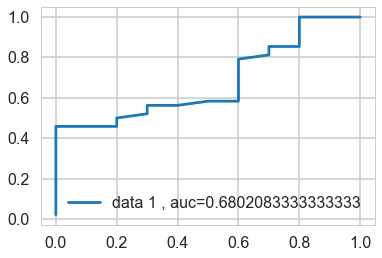

In [18]:
from sklearn import metrics
y_predict_proba = LogReg.predict_proba(X_test)[::,1]
fpr , tpr , _ = metrics.roc_curve(op , y_predict_proba)
auc = metrics.roc_auc_score(op , y_predict_proba)
plt.plot(fpr , tpr , label = "data 1 , auc="+str(auc))
plt.legend(loc = 4)
plt.show()

### There are various ways to deal with unbalanced dataset like

* Random Resampling Techiniques like **Random Under Sampling** , **Random Over Sampling** and **Cluster-Based Over Sampling**.


* Informed Over Sampling Techniques like **Synthetic Minority Over Sampling Technique** also known as **SMOTE** or Modified SMOTE .


* Then there are Algorithmic Ensemble Techiniques like **Bagging Based** , **Boosting Based** like **ADa Boost** or **Gradient Tree Boosting** or **XG Boost** .


### First Let's see What is Oversampling and Undersampling.

* Dealing with imbalanced datasets entails strategies such as improving classification algorithms or balancing classes in the training data ( data preprocessing ) before providing the input to machine learning algorithm.


* The main objective of balancing classes is to either increasing the frequency of the minority class i.e **Over Sampling** or decreasing the frequency of the majority class i.e **Under Sampling**. This is done in order to obtain approximately the same no. of instances for both the classes.

### For this dataset we'll use Informed Over Sampling Technique Known as SMOTE.

* This technique is used to avoid any overfitting which occurs when exact replicas of minority instances are added to the main dataset. A subset of data is then taken from the minority class as sample and then new synthetic instances are created. These synthetic instances are then added to  the original dataset. The new dataset is used as a sample to train the classification model. 

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold


classifier = RandomForestClassifier

kf = KFold(n_splits = 5 , random_state = 42)
accuracy = []
precision = []
recall = []
f1 =  []
auc = []

X_train = train_df[['Mothers Single Year of Age','Cigarettes Before Pregnancy ','Cigarettes 1st trimester','Cigarettes 2nd trimester','Cigarettes 3rd trimester' , 'Number of previous Cesarean Deliveries' , "Mother's Height in Inches" ]].values
Y_train = train_df[['Infant Living at Time of Report']].values.ravel()

X_test = test_df[['Mothers Single Year of Age' , 'Cigarettes Before Pregnancy ','Cigarettes 1st trimester','Cigarettes 2nd trimester','Cigarettes 3rd trimester' , 'Number of previous Cesarean Deliveries' , "Mother's Height in Inches" ]].values

Y_test = []
f = open('results_infant.csv')
for i in f :
    Y_test.append(int(i.strip()))




for train , test in kf.split(X_train , Y_train):
    pipeline = make_pipeline_imb(SMOTE() , classifier(random_state = 42))
    model = pipeline.fit(X_train[train] , Y_train[train])
    prediction = model.predict(X_train[test])
    
    accuracy.append(pipeline.score(X_train[test], Y_train[test]))
    precision.append(precision_score(Y_train[test], prediction))
    recall.append(recall_score(Y_train[test], prediction))
    f1.append(f1_score(Y_train[test], prediction))
    #auc.append(roc_auc_score(Y_train[test], prediction))
    
print("done right mean of scores 5-fold:")
print("accuracy: {}".format(np.mean(accuracy)))
print("precision: {}".format(np.mean(precision)))
print("recall: {}".format(np.mean(recall)))
print("f1: {}".format(np.mean(f1)))

done right mean of scores 5-fold:
accuracy: 0.9816712479759986
precision: 0.9965934111677534
recall: 0.9849834073905915
f1: 0.9907234538953837


In [11]:
print(Y_test)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [16]:
unique , counts = np.unique(Y_train[test] , return_counts = True)
dict(zip(unique , counts))

{0: 35, 1: 8061}

In [18]:
unique , counts = np.unique(prediction , return_counts = True)
dict(zip(unique , counts))

{0: 29, 1: 8067}